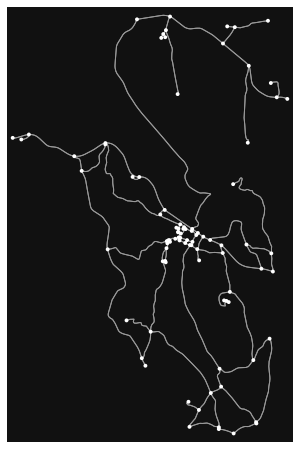

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [1]:
import utils as ut
import drone_no_eulerian as dne
import drone_eulerian as de
import dijkstra_algorithm as da

import networkx as nx
import osmnx as ox

# Get the city graph (from OpenStreetMap), filter only the drive ways
city = ox.graph_from_place('Collonges-la-Rouge, France', network_type='drive', simplify=True)
#city = ox.graph_from_place('Le Kremlin-Bicêtre, France', network_type='drive', simplify=True)

# Display the graph
ox.plot_graph(city)

In [2]:
#Calculate graph’s total edge length.
totalLength = ox.stats.edge_length_total(city)
totalLength

69464.969

In [3]:
# Retrieve nodes and edges from the graph
def data_from_graph(G):
    nodes_gdfs, edges_gdfs = ox.graph_to_gdfs(G)
    nodes = list(G.nodes())
    edges = list(G.edges())
    
    weigths = []
    for val in edges_gdfs['length']:
        weigths.append(val)
    
    return nodes, edges, weigths

nodes, edges, weigths = data_from_graph(city)

In [4]:
# Construct data we need for using our algorithm
def data_for_algo(N, E, W):
    data = []
    i = 0
    while i < len(E):
        n1 = N.index(E[i][0])
        n2 = N.index(E[i][1])
        data.append((n1, n2, W[i]))
        i = i + 1

    nb_nodes = len(N)

    return (nb_nodes, data)
    
    
data = data_for_algo(nodes, edges, weigths)

In [5]:
#apply the algorithm to get the path and the total length
res = dne.chinese_postman(*data)

In [21]:
# On considère qu'une deneigeuse va à 7.5km/h, alors le temps total pour deneiger cette portion du graphe vaut:
totalTime = (res[1] / 1000) / 7.5
#print(totalTime)

In [17]:
# On récupère le graphe de Montréal
montreal_graph = ox.graph_from_place('Montréal, Canada', network_type='drive', simplify=True)
#ox.plot_graph(montreal_graph)

#On récupère les données nécéssaires pour mettre en place la solution
nodes_montreal, edges_montreal, weights_montreal = data_from_graph(montreal_graph)
data_montreal = data_for_algo(nodes_montreal, edges_montreal, weights_montreal)

# On a nb_nodes = 19690 noeuds dans le graphe de montréal
nb_nodes = len(nodes_montreal)

# On divise le nombre de noeuds par 197 pour avoir 197 sous-graphes de montréal de 100 noeuds environ
nb_nodes_per_sg = nb_nodes / 197

# On a à disposition 2200 machines et autant d'employés, donc 2200 / 197 qui donne environ 11 machines par zone
nb_machines = 2200
nb_machines_per_sg = nb_machines / 197

# On pourrait ensuite diviser chaque zone en 3 mini-zones pour optimiser le travail
# On utilisera 1 machine pour le voie et une machine pour chaque coté du trottoir, 
# donc environ 3 au moins machines par mini-zone
nb_machines_per_mz = nb_machines_per_sg / 3

# On résoud ainsi efficacement le problème du déneigement de Montréal en un temps minimum d'environ 3 heures 
# pour chaque sous-graphe qui ferait approximativement la taille de la ville Collonges-la-Rouge qu'on a pris 
# comme sous-graphe test.